In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('C:\\Users\\Allah-Akbr\\Downloads\\archive\\Arabic_Food_101\\Images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os
import os
for root, dirs, files in os.walk("C:\\Users\\Allah-Akbr\\Downloads\\archive\\food\\Images", topdown=False):
    for name in dirs:
        print(os.path.join(root, name))

In [12]:
data_dir = "C:\\Users\\Allah-Akbr\\Downloads\\archive\\food\\Images"

data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 2741 files belonging to 16 classes.


In [13]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split = 0.2)

In [14]:
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [15]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "training")

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode="categorical",
    subset = "validation")

Found 2199 images belonging to 16 classes.
Found 542 images belonging to 16 classes.


In [16]:
num_classes = len(data.class_names)
print(".... Number of Classes : {0} ....".format(num_classes))

.... Number of Classes : 16 ....


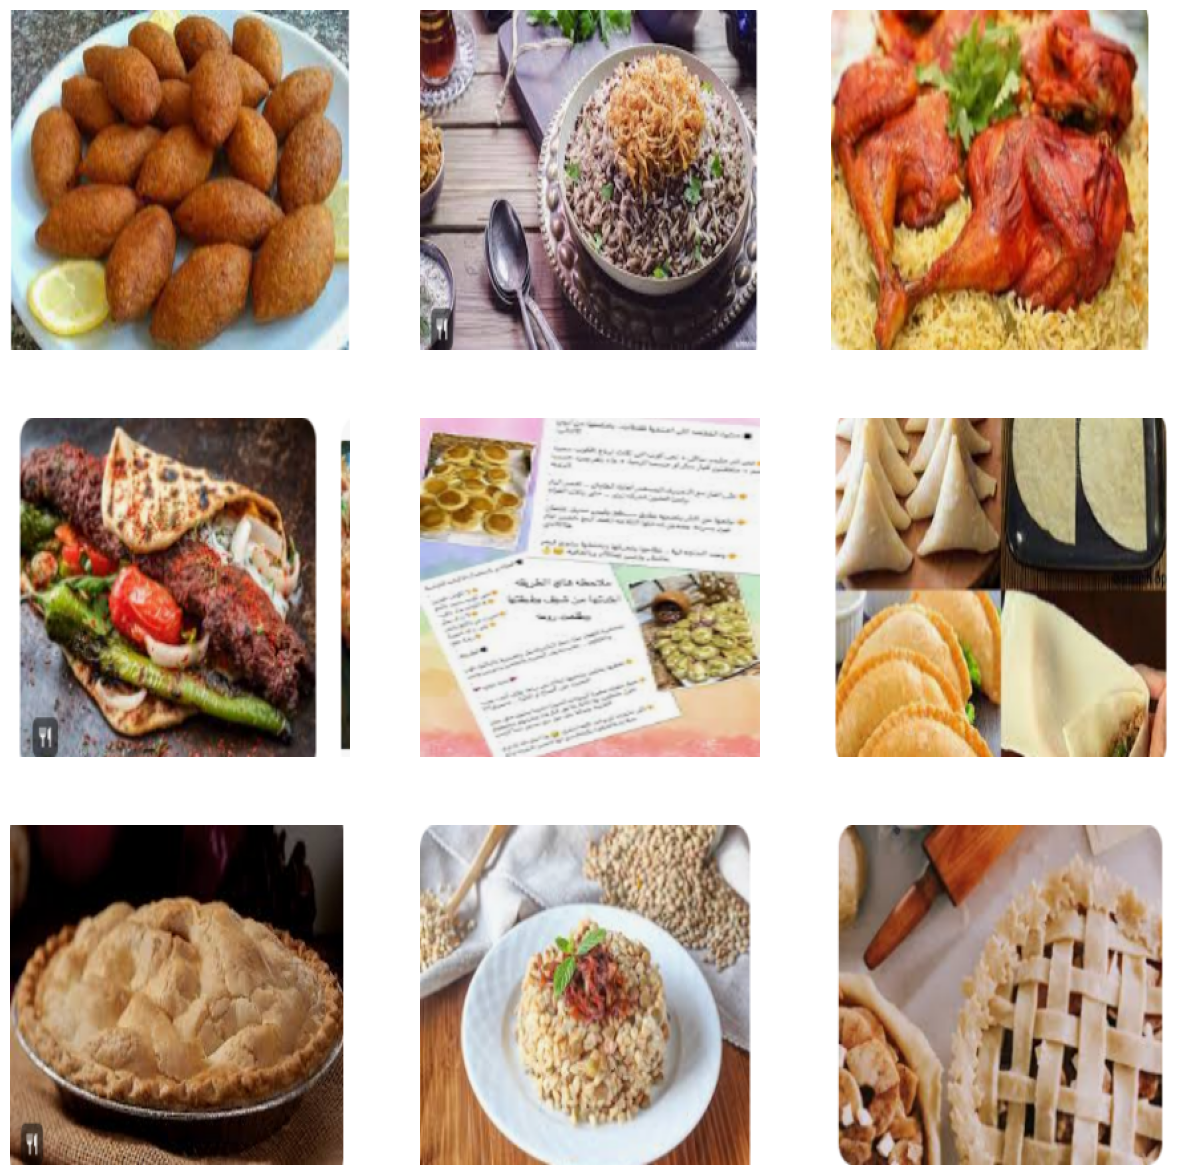

In [17]:
def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

show_img(data)

In [18]:
pre_trained = InceptionV3(weights="imagenet", include_top=False, input_shape=img_shape, pooling="avg")

for layer in pre_trained.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 185s 2us/step


In [19]:
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 228, 228, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 113, 113, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 113, 113, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 113, 113, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 111, 111, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 111, 111, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 111, 111, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 111, 111, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 111, 111, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 111, 111, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 55, 55, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 55, 55, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 55, 55, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 55, 55, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 53, 53, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,925,552 (91.27 MB)

 Trainable params: 2,118,672 (8.08 MB)

 Non-trainable params: 21,806,880 (83.19 MB)

In [21]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs =10,
                    verbose = 1)

C:\Users\Allah-Akbr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3559 - loss: 2.6087

C:\Users\Allah-Akbr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.3574 - loss: 2.6040 - val_accuracy: 0.5469 - val_loss: 1.6940
Epoch 2/10
 1/68 ━━━━━━━━━━━━━━━━━━━━ 1:29 1s/step - accuracy: 0.5000 - loss: 2.0019

C:\Users\Allah-Akbr\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5000 - loss: 2.0019 - val_accuracy: 0.5667 - val_loss: 1.4084
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.6519 - loss: 1.4932 - val_accuracy: 0.6035 - val_loss: 1.4441
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6562 - loss: 1.2824 - val_accuracy: 0.6667 - val_loss: 1.3579
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6986 - loss: 1.1145 - val_accuracy: 0.6270 - val_loss: 1.4537
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5625 - loss: 1.2567 - val_accuracy: 0.7000 - val_loss: 1.2289
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7066 - loss: 1.0451 - val_accuracy: 0.6055 - val_loss: 1.6031
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7812 - loss: 0.9137 - val_accuracy: 0.7000 - val_loss: 0.9201
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.7156 - loss: 0.9740 - val_accuracy: 0.6641 - val_loss: 1.

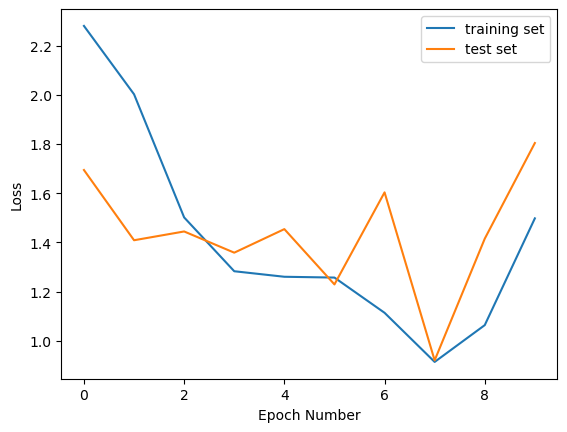

In [23]:
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="training set")
plt.plot(history.history["val_loss"], label="test set")
plt.legend()

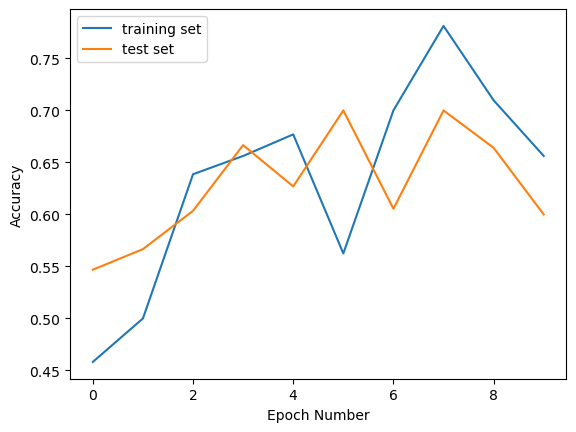

In [24]:
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label="training set")
plt.plot(history.history["val_accuracy"], label="test set")
plt.legend()